In [223]:
from keras_facenet import FaceNet
from json import load
import cv2
from PIL import Image
import numpy as np
import sys
import os
import pandas as pd
import random
import pathlib


In [224]:

CONF_THRESHOLD = 0.5
NMS_THRESHOLD = 0.4
IMG_WIDTH = 416
IMG_HEIGHT = 416

# Default colors
COLOR_BLUE = (255, 0, 0)
COLOR_GREEN = (0, 255, 0)
COLOR_RED = (0, 0, 255)
COLOR_WHITE = (255, 255, 255)
COLOR_YELLOW = (0, 255, 255)




In [225]:
# loading the FaceNet model
embedder = FaceNet()

In [226]:
"""
(10 points) identity CelebA.txt includes pairs of the file name and the id. Using
identity CelebA.txt, choose the image files of ids included in the selected ids.txt.
Create a selected dataset with the selected images. The selected dataset will include
1, 200 images. (30 images for each of the 40 celebrities)

"""

celebA = pd.read_excel(r'celebA.xlsx')
selected = pd.read_excel(r'selected.xlsx')
# choose image files of ids included in selected
df3 = celebA[celebA['index'].isin(selected['selected'])]
# df3.to_csv('df3.csv')

cwd = pathlib.Path().parent.absolute()
selected = pd.read_csv(os.path.join(cwd, 'df3.csv'))
selected = selected.head(40)
selected_images = selected['images']
selected_images.shape

(40,)

In [227]:
"""
 (25 points) By using pre-trained YOLO V3 and Facenet model, implement a Python
program image2vect.py.
• Input: An image (x) which includes a human face.
• Intermediate steps
1. Find bounding box of the face in the input image.
2. Crop the input image for the bounding box.
Output is embedding vector

"""

# read a random image

base_dir = 'image_data/img_celeba/'
random_index = random.randint(0,len(selected_images)-1)
rand_im = selected_images[random_index]
path = os.path.join(base_dir,rand_im)
images = cv2.imread(path)
detections = embedder.extract(images, threshold=0.95)
# print(detections[0]['embedding'])
confidence = detections[0]['confidence']
faces = detections[0]['box']
left = faces[0]
top = faces[1]
width = faces[2]
height = faces[3]



In [228]:
# draw bounding box on image
# Draw the predicted bounding box

def draw_predict(frame, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv2.rectangle(frame, (left, top), (right, bottom), COLOR_YELLOW, 2)

    text = '{:.2f}'.format(conf)

    # Display the label at the top of the bounding box
    label_size, base_line = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

    top = max(top, label_size[1])
    cv2.putText(frame, text, (left, top - 4), cv2.FONT_HERSHEY_SIMPLEX, 0.4,
                COLOR_WHITE, 1)

In [247]:
# display image with bounding box on face

draw_predict(images, confidence, left, top, left + width, top + height)# display image
cv2.imshow('wind_name', images)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [248]:
# display cropped image for bounding box

cropped = images[faces[1]:faces[1]+faces[3], faces[0]:faces[0]+faces[2]]
cropped
# display image
cv2.imshow('wind_name', cropped)
cv2.waitKey(0) 
cv2.destroyAllWindows()


In [231]:
def image2vect(image):
    path = os.path.join(base_dir, image)
    detects = embedder.extract(path, threshold=0.95)
#     print(detects[0]['embedding'])
    return detects[0]['embedding']


tau =  0.82
0.9954442856833339
0.8479871451854706
1.1188485696911812
0.8572599291801453
0.9592905528843403
0.8049329966306686
1.0596558339893818
1.1680336594581604
1.2380581498146057
0.872024342417717
1.0804856643080711
0.8883248493075371
0.9906799076125026
1.3010250926017761
0.6770361065864563
0.7046345770359039
0.8217733502388
1.062304511666298
0.989991370588541
0.880620688199997
0.7961956411600113
1.4679749608039856
1.017547344788909
0.4753325581550598
1.0755040273070335
1.1100144386291504
0.8675621896982193
0.8760290518403053
0.9441853016614914
0.8944453373551369
1.0800230577588081
1.08981491625309
0.8092647641897202
0.7683277130126953
1.0656609013676643
0.8630525022745132
0.86689093708992
1.036775380373001
0.6364414393901825
       images  index
3  000599.jpg   6691
true_similar = []
predicted_similar = ['001332.jpg', '002877.jpg', '003375.jpg', '004659.jpg', '005121.jpg', '006645.jpg', '007039.jpg', '007386.jpg']
correctly_classiified = []
1.090613879263401
0.9104241728782654
0.7

0.91093660145998
0.6908883452415466
0.8062577098608017
0.8965207263827324
0.9458658918738365
0.6883195340633392
1.0026464632246643
0.7152942419052124
1.0714834108948708
1.116726815700531
0.9483918622136116
0.1582571268081665
0.9402568899095058
0.968590747565031
1.0182032380253077
1.00070456933463
0.09654766321182251
0.6667317748069763
0.7159627676010132
1.0923683419823647
0.8046089708805084
1.302414894104004
0.9172957018017769
0.93571887165308
0.8430452197790146
        images  index
18  003882.jpg   8788
true_similar = ['005559.jpg', '006477.jpg']
predicted_similar = ['000434.jpg', '001248.jpg', '002506.jpg', '002877.jpg', '003375.jpg', '004558.jpg', '004739.jpg', '005559.jpg', '006477.jpg', '006497.jpg', '006645.jpg', '007047.jpg']
correctly_classiified = ['005559.jpg', '006477.jpg']
0.9485982768237591
1.0121158342808485
1.01483035646379
0.7683277130126953
1.0005586520419456
1.0840252339839935
0.8337365537881851
0.8261270672082901
1.0590346045792103
1.0600710660219193
1.0338245853781

0.9026954770088196
0.7146941423416138
0.6002711653709412
1.171307012438774
0.9104241728782654
1.0309041999280453
0.5787284970283508
0.8569287061691284
1.1307215243577957
1.162513107061386
0.9245621785521507
1.0786129385232925
0.8215746134519577
0.6744185984134674
1.0401668064296246
0.9121890515089035
0.8768166899681091
0.9078071117401123
0.8133202195167542
0.9134556725621223
1.0121158342808485
0.691539078950882
1.0631799548864365
1.1306423246860504
1.238122597336769
0.8390514254570007
       images  index
1  000308.jpg   8939
true_similar = ['001248.jpg', '007047.jpg']
predicted_similar = ['000982.jpg', '001248.jpg', '001332.jpg', '002506.jpg', '002877.jpg', '003375.jpg', '004558.jpg', '005559.jpg', '005988.jpg', '006497.jpg', '007047.jpg', '007386.jpg']
correctly_classiified = ['001248.jpg', '007047.jpg']
0.9669509641826153
0.856134444475174
1.0595074146986008
0.8883248493075371
0.8695518523454666
0.9392293766140938
0.8509928286075592
1.0231316536664963
0.9794577918946743
1.2465990036

1.1802625954151154
1.14858940243721
1.029581569135189
1.0596558339893818
0.7354024946689606
1.0582716651260853
0.8800803124904633
0.8970319926738739
0.9417190551757812
0.9233729541301727
0.991586223244667
1.0231316536664963
1.0151145989075303
1.0564034208655357
0.9314952045679092
0.9381909519433975
0.9133854359388351
1.0243116989731789
0.4675196409225464
0.9617854878306389
0.7485045790672302
0.7185801863670349
0.9651493951678276
1.185020700097084
0.27964240312576294
1.1322714984416962
1.0420883782207966
0.2622053027153015
0.9931443221867085
0.7027136087417603
1.0599021762609482
1.0440555810928345
0.7968832403421402
0.8261270672082901
0.9516532309353352
0.979740297421813
0.9205546453595161
0.4120131731033325
1.0377646535634995
       images  index
7  001379.jpg   2861
true_similar = ['004105.jpg', '005154.jpg', '006051.jpg', '007268.jpg']
predicted_similar = ['000982.jpg', '004105.jpg', '004659.jpg', '004739.jpg', '005154.jpg', '006051.jpg', '006233.jpg', '006645.jpg', '007039.jpg', '00

1.1704992204904556
1.152072235941887
0.8255898803472519
0.9022770598530769
0.9084571376442909
0.8081873655319214
0.8422786444425583
0.9336327165365219
0.9274482354521751
0.8231533467769623
0.8379601836204529
1.0203405302017927
1.0845065861940384
0.9208477288484573
1.0647505521774292
0.1332073211669922
0.7558172047138214
0.9517187885940075
        images  index
17  003580.jpg   4744
true_similar = ['001976.jpg', '007242.jpg']
predicted_similar = ['000434.jpg', '000599.jpg', '001976.jpg', '005121.jpg', '005988.jpg', '006051.jpg', '006477.jpg', '006497.jpg', '007242.jpg', '007268.jpg']
correctly_classiified = ['001976.jpg', '007242.jpg']
1.2353668361902237
1.171307012438774
0.7278116941452026
0.8217733502388
1.0916078686714172
0.9127401262521744
0.9587313681840897
0.9133854359388351
1.1423383355140686
0.993827972561121
0.144889235496521
1.0877352505922318
0.8835503607988358
1.1186520904302597
1.1831426471471786
1.1112219467759132
1.0341837853193283
0.8965207263827324
0.9975142423063517
0.

1.12893745303154
0.8151436597108841
1.0457211323082447
0.9657411463558674
0.8360619395971298
1.2312535494565964
1.0432733036577702
0.7031046748161316
0.9362000003457069
1.0741140469908714
0.9946281271986663
1.0236702747642994
0.8855781778693199
0.8791053146123886
1.0039742370136082
1.1451228708028793
0.9510339349508286
0.9327134341001511
1.227981075644493
1.1518649607896805
1.0953656509518623
        images  index
14  002711.jpg    417
true_similar = ['001493.jpg']
predicted_similar = ['000109.jpg', '001424.jpg', '001493.jpg', '002877.jpg', '004558.jpg', '004769.jpg', '005559.jpg', '006497.jpg']
correctly_classiified = ['001493.jpg']
precision at 0.88 = [0.2, 0.2, 0.2, 0.06666666666666667, 0.25, 0.09090909090909091, 0.4, 0.4, 0.09090909090909091, 0.125]
recall at 0.88 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
tau =  0.9
0.9077297076582909
0.8768166899681091
0.8557811081409454
0.8944453373551369
0.8299264460802078
1.08012355864048
0.7122712135314941
0.7027136087417603
0.89297

0.9383757524192333
1.1307215243577957
1.041821051388979
1.4679749608039856
0.844921424984932
0.809220165014267
1.0096447253599763
0.7185801863670349
1.017807513475418
0.9564119763672352
1.1237566620111465
0.8855041414499283
1.0794112756848335
1.1237276196479797
0.9657411463558674
1.206089586019516
1.002150375628844
1.1704992204904556
0.7152942419052124
0.8403882682323456
0.9419037438929081
0.990561974234879
1.1873942762613297
1.2832723557949066
0.7603001743555069
0.7801799178123474
1.1924201250076294
0.8587408810853958
0.933736689388752
0.9756097737699747
0.7883003801107407
0.9630599357187748
1.2011357992887497
1.1292333453893661
0.9470841102302074
1.159323051571846
1.085778333246708
0.832979366183281
1.1105975359678268
        images  index
22  004739.jpg   7426
true_similar = []
predicted_similar = ['000982.jpg', '001248.jpg', '001379.jpg', '002208.jpg', '003882.jpg', '004105.jpg', '005154.jpg', '005559.jpg', '006051.jpg', '006477.jpg', '007268.jpg']
correctly_classiified = []
0.9655

1.0864922925829887
0.8360619395971298
1.139246940612793
1.0626989528536797
1.152072235941887
1.0714834108948708
1.0696620792150497
1.0192710440605879
1.1810428202152252
1.1873942762613297
1.1812795847654343
0.9659694544970989
1.0667627230286598
1.0436151586472988
1.0666140243411064
0.8383242338895798
0.9107518866658211
1.1135962083935738
1.1160252541303635
1.0023622682783753
0.9714978113770485
1.0213498994708061
0.9952219962142408
1.1356977373361588
1.0839649960398674
1.027271095663309
        images  index
23  004769.jpg   4955
true_similar = ['001424.jpg']
predicted_similar = ['000109.jpg', '001248.jpg', '001424.jpg', '002711.jpg', '006173.jpg', '006233.jpg']
correctly_classiified = ['001424.jpg']
0.9954442856833339
0.8479871451854706
1.1188485696911812
0.8572599291801453
0.9592905528843403
0.8049329966306686
1.0596558339893818
1.1680336594581604
1.2380581498146057
0.872024342417717
1.0804856643080711
0.8883248493075371
0.9906799076125026
1.3010250926017761
0.6770361065864563
0.70463

1.1271624863147736
1.3489479720592499
1.0386058799922466
       images  index
0  000109.jpg   3325
true_similar = []
predicted_similar = ['000308.jpg', '000982.jpg', '001332.jpg', '001424.jpg', '002208.jpg', '002711.jpg', '002877.jpg', '003375.jpg', '004558.jpg', '004659.jpg', '004739.jpg', '004769.jpg', '006233.jpg', '006497.jpg']
correctly_classiified = []
1.1064786911010742
0.59518101811409
0.9656376503407955
0.9592905528843403
0.9439276270568371
1.1481413543224335
1.0582716651260853
0.9433367438614368
1.0654186233878136
0.9175882786512375
0.9459578990936279
0.9392293766140938
1.132233202457428
0.9308879002928734
0.9568587429821491
0.8711837530136108
0.9127401262521744
0.6605236828327179
0.9048137962818146
0.6653734445571899
0.9408830031752586
0.809220165014267
0.8748079091310501
0.9279745444655418
0.8734951615333557
0.6330653727054596
0.7751268744468689
0.8930146619677544
0.7786548882722855
1.08012355864048
0.7239692211151123
0.7884705513715744
1.0260137673467398
1.0840252339839935

0.9480403140187263
0.6744185984134674
0.92751295119524
0.8675621896982193
0.8773223385214806
0.7751268744468689
0.8859983533620834
1.0420883782207966
1.007231738884002
0.934895321726799
0.7737198770046234
1.1201622933149338
0.9815561957657337
1.0843917801976204
0.9362000003457069
0.9768847301602364
0.9490913338959217
0.8081873655319214
0.9402568899095058
0.8638365864753723
0.8058525323867798
0.9309030175209045
1.1924201250076294
1.0436151586472988
1.0377001650631428
1.070455826818943
0.7859647870063782
0.8925676941871643
0.9531892500817776
0.9807402770966291
0.9080946370959282
1.0164479184895754
1.029946208000183
1.1468735188245773
0.7065122723579407
0.9803586583584547
0.8302156925201416
1.00159527733922
0.8849223852157593
        images  index
27  005988.jpg   9106
true_similar = []
predicted_similar = ['000308.jpg', '000434.jpg', '000599.jpg', '000982.jpg', '001248.jpg', '001332.jpg', '001493.jpg', '001976.jpg', '002711.jpg', '003580.jpg', '004105.jpg', '004558.jpg', '004659.jpg', '0

1.0526462607085705
0.9121890515089035
1.0466936603188515
0.9441853016614914
0.8867740258574486
0.7786548882722855
0.9161945059895515
0.9931443221867085
0.8714251816272736
0.9558957442641258
1.053317166864872
1.078140452504158
0.44580405950546265
1.2469162344932556
0.9946281271986663
1.0679664760828018
0.8932667747139931
0.9336327165365219
1.0182032380253077
1.011006273329258
0.9582777284085751
0.9759522825479507
0.933736689388752
0.8383242338895798
1.0270609501749277
1.2210308015346527
0.7759155184030533
0.9531892500817776
1.0180796142667532
1.0172703079879284
1.0410853549838066
0.8622656166553497
0.8645757734775543
0.8722054362297058
1.2518403232097626
1.0844078287482262
0.9515112414956093
1.063175231218338
0.9250625297427177
        images  index
29  006173.jpg   1223
true_similar = ['002249.jpg']
predicted_similar = ['000308.jpg', '000599.jpg', '000982.jpg', '001248.jpg', '001332.jpg', '001424.jpg', '001493.jpg', '002249.jpg', '003375.jpg', '003580.jpg', '004558.jpg', '004739.jpg', 

1.0243116989731789
0.4675196409225464
0.9617854878306389
0.7485045790672302
0.7185801863670349
0.9651493951678276
1.185020700097084
0.27964240312576294
1.1322714984416962
1.0420883782207966
0.2622053027153015
0.9931443221867085
0.7027136087417603
1.0599021762609482
1.0440555810928345
0.7968832403421402
0.8261270672082901
0.9516532309353352
0.979740297421813
0.9205546453595161
0.4120131731033325
1.0377646535634995
       images  index
7  001379.jpg   2861
true_similar = ['004105.jpg', '005154.jpg', '006051.jpg', '007268.jpg']
predicted_similar = ['000982.jpg', '001332.jpg', '001424.jpg', '001493.jpg', '001976.jpg', '002877.jpg', '003375.jpg', '003580.jpg', '004105.jpg', '004558.jpg', '004659.jpg', '004739.jpg', '004769.jpg', '005154.jpg', '006051.jpg', '006233.jpg', '006645.jpg', '007039.jpg', '007047.jpg', '007068.jpg', '007242.jpg', '007268.jpg']
correctly_classiified = ['006051.jpg', '007268.jpg', '004105.jpg', '005154.jpg']
0.9532226845622063
0.8215746134519577
0.739232748746872
1.1

1.2353668361902237
1.171307012438774
0.7278116941452026
0.8217733502388
1.0916078686714172
0.9127401262521744
0.9587313681840897
0.9133854359388351
1.1423383355140686
0.993827972561121
0.144889235496521
1.0877352505922318
0.8835503607988358
1.1186520904302597
1.1831426471471786
1.1112219467759132
1.0341837853193283
0.8965207263827324
0.9975142423063517
0.9698412138968706
0.9838076010346413
1.1704992204904556
1.152072235941887
0.8255898803472519
0.9022770598530769
0.9084571376442909
0.8081873655319214
0.8422786444425583
0.9336327165365219
0.9274482354521751
0.8231533467769623
0.8379601836204529
1.0203405302017927
1.0845065861940384
0.9208477288484573
1.0647505521774292
0.1332073211669922
0.7558172047138214
0.9517187885940075
        images  index
17  003580.jpg   4744
true_similar = ['001976.jpg', '007242.jpg']
predicted_similar = ['000434.jpg', '000599.jpg', '001248.jpg', '001332.jpg', '001379.jpg', '001493.jpg', '001976.jpg', '002249.jpg', '003882.jpg', '004105.jpg', '004558.jpg', '00

0.8185097128152847
0.9026954770088196
0.8933522030711174
1.3010250926017761
1.0531853511929512
0.9308879002928734
1.2528680860996246
1.0564034208655357
0.81418177485466
0.1638416051864624
1.253912329673767
1.0481577329337597
1.2023645788431168
0.8930353820323944
0.8693044483661652
0.9588063918054104
1.1831426471471786
0.91093660145998
1.12893745303154
0.8151436597108841
1.0457211323082447
0.9657411463558674
0.8360619395971298
1.2312535494565964
1.0432733036577702
0.7031046748161316
0.9362000003457069
1.0741140469908714
0.9946281271986663
1.0236702747642994
0.8855781778693199
0.8791053146123886
1.0039742370136082
1.1451228708028793
0.9510339349508286
0.9327134341001511
1.227981075644493
1.1518649607896805
1.0953656509518623
        images  index
14  002711.jpg    417
true_similar = ['001493.jpg']
predicted_similar = ['000109.jpg', '000308.jpg', '000434.jpg', '001248.jpg', '001424.jpg', '001493.jpg', '002506.jpg', '002877.jpg', '003375.jpg', '003882.jpg', '004558.jpg', '004739.jpg', '004

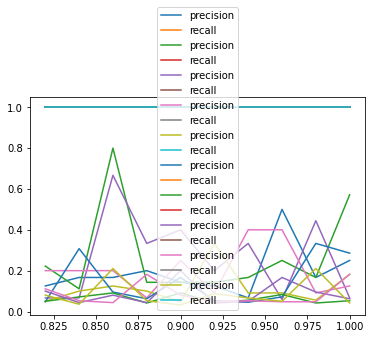

In [246]:
"""
Finding 1199 distances between a randomly chosen image and all other 1199 images
"""
# 1199 distances

def findSimilar(tau):
    # get random image
    random_index = random.randint(0,len(selected_images)-1)
    rand_im = selected_images[random_index]
    rand_vect = image2vect(rand_im)
    distances = []
    similars = []
    similar_images = {}

#     print(len(selected_images))
    for i in range(len(selected_images)):

        if selected_images[i] != rand_im: # all images except the same one
            selected_vect = image2vect(selected_images[i])
    #         dist = np.linalg.norm(selected_vect-rand_vect)
            dist = embedder.compute_distance(selected_vect, rand_vect)
            distances.append(dist)   # contains 1199 distances
            print(dist)
            if dist < tau:
                similars.append(selected_images[i])  # distances less than tow

    similar_images[rand_im] = similars

    # precision and recall
    # list of correct similar faces
    # get rand_im id
    rand_id = selected[selected['images'] == rand_im]
    print(rand_id)
    rand_id = rand_id.iloc[0]['index']
    rand_id = int(rand_id)
    
    # get images from selected whose id == rand_id
    true_similar = selected_images[(selected['index'] == rand_id) & (selected['images'] != rand_im)]
    true_similar = true_similar.values.tolist()
    print(f'true_similar = {true_similar}')
    if len(true_similar) == 0:
        true_similar.append('null')
    
    predicted_similar = list(similar_images.values())[0]
    print(f'predicted_similar = {predicted_similar}')
    if len(predicted_similar) == 0:
        predicted_similar.append('null')

    # get correctly classified images
    correctly_classified = set(true_similar) & set(predicted_similar)
    correctly_classified = list(correctly_classified)
    print(f'correctly_classiified = {correctly_classified}')
    if len(correctly_classified) == 0:
        correctly_classified.append('null')
    
    # precision
    precision = len(correctly_classified) / len(predicted_similar)
#     precision

    # recall
    recall = len(correctly_classified) / len(true_similar)
#     recall
    #  A list of image files recognized as the same celebrity of the input image.
    return (precision, recall)



tau = [0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1]
# run findSimilar 10 times
for t in tau:
    print('tau = ', t)
    precision = []
    recall = []
    for h in range(10):
        (p,r) = findSimilar(t)
        precision.append(p)
        recall.append(r)
    print(f'precision at {t} = {precision}')
    print(f'recall at {t} = {recall}')
    plt.plot(tau, precision, label='precision')
    plt.plot(tau, recall, label='recall')
plt.legend()
plt.show()
        
    
    
    


